## Problem3

A plastics manufacturing plant has recorded their monthly sales data from 1949 to 1953. Perform forecasting on the data and bring out insights from it and forecast the sale for the next year. 

In [1]:
import pandas as pd
sales = pd.read_csv("PlasticSales.csv")
sales.head()

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030


In [2]:
sales.dtypes

Month    object
Sales     int64
dtype: object

In [3]:
sales.shape

(60, 2)

In [6]:
p = sales['Month'][0]
p[0:3]

'Jan'

In [4]:
# Pre processing
import numpy as np

sales["t"] = np.arange(1,61)

sales["t_square"] = sales["t"] * sales["t"]
sales["log_Sales"] = np.log(sales["Sales"])
sales.columns

Index(['Month', 'Sales', 't', 't_square', 'log_Sales'], dtype='object')

In [7]:
sales['months']= 0

   
for i in range(60):
    p = sales['Month'][i]
    sales['months'][i]= p[0:3]
    
month_dummies = pd.DataFrame(pd.get_dummies(sales['months']))
sales1 = pd.concat([sales, month_dummies], axis = 1)

C:\Users\AANAND~1.ORA\AppData\Local\Temp/ipykernel_2068/1095229312.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['months'][i]= p[0:3]
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:>

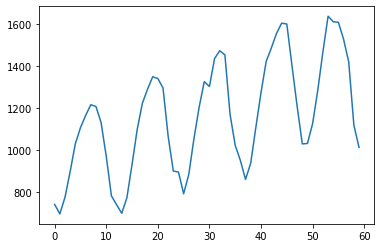

In [8]:
# Visualization - Time plot
sales1.Sales.plot()



In [9]:
sales1.shape


(60, 18)

In [10]:
sales1.head(20)

,Month,Sales,t,t_square,log_Sales,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-49,742,1,1,6.609349,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-49,697,2,4,6.546785,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-49,776,3,9,6.654153,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-49,898,4,16,6.800170,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,May-49,1030,5,25,6.937314,May,0,0,0,0,0,0,0,0,1,0,0,0
5,Jun-49,1107,6,36,7.009409,Jun,0,0,0,0,0,0,1,0,0,0,0,0
6,Jul-49,1165,7,49,7.060476,Jul,0,0,0,0,0,1,0,0,0,0,0,0
7,Aug-49,1216,8,64,7.103322,Aug,0,1,0,0,0,0,0,0,0,0,0,0
8,Sep-49,1208,9,81,7.096721,Sep,0,0,0,0,0,0,0,0,0,0,0,1
9,Oct-49,1131,10,100,7.030857,Oct,0,0,0,0,0,0,0,0,0,0,1,0


In [11]:
# Data Partition
Train = sales1.head(56)
Test = sales1.tail(4)



In [12]:
# to change the index value in pandas data frame 
# Test.set_index(np.arange(1,13))

####################### L I N E A R ##########################
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales ~ t', data = Train).fit()

linear_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     31.03
Date:                Thu, 12 May 2022   Prob (F-statistic):           8.25e-07
Time:                        12:32:55   Log-Likelihood:                -379.41
No. Observations:                  56   AIC:                             762.8
Df Residuals:                      54   BIC:                             766.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    871.4123     58.463     14.905      0.000     754.201     988.623
t              9.9392      1.784      5.570      0.000       6.362      13.517
==============================================================================
Omnibus:                       34.156   Durbin-Watson:                   0.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.030
Skew:                          -0.211   Prob(JB):                       0.0809
Kurtosis:                       1.593   Cond. No.                         66.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred_linear))**2))
rmse_linear

287.444483800074

In [14]:
##################### Exponential ##############################

Exp = smf.ols('log_Sales ~ t', data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp



295.6343369874729

In [15]:
#################### Quadratic ###############################

Quad = smf.ols('Sales ~ t + t_square', data = Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred_Quad))**2))
rmse_Quad



309.368252776009

In [16]:
################### Additive seasonality ########################

add_sea = smf.ols('Sales ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+ Dec', data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred_add_sea))**2))
rmse_add_sea



69.89366924121299

In [17]:
################## Multiplicative Seasonality ##################

Mul_sea = smf.ols('log_Sales ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea



76.08885833163521

In [18]:
################## Additive Seasonality Quadratic Trend ############################

add_sea_Quad = smf.ols('Sales ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 



296.52107554902204

In [19]:
################## Multiplicative Seasonality Linear Trend  ###########

Mul_Add_sea = smf.ols('log_Sales ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

################## Testing #######################################

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse



,MODEL,RMSE_Values
0,rmse_linear,287.444484
1,rmse_Exp,295.634337
2,rmse_Quad,309.368253
3,rmse_add_sea,69.893669
4,rmse_add_sea_quad,296.521076
5,rmse_Mult_sea,76.088858
6,rmse_Mult_add_sea,271.273775


'rmse_add_sea' has the least value among the models prepared so far Predicting new values 
